In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

#Get data
df=pdr.get_data_yahoo('^HSI', '2010-01-01', '2020-12-31')

df=df.dropna()
df=df[['Open', 'High', 'Low', 'Close']]

#Define X
df['Open-Close']=df.Open-df.Close
df['High-Low']=df.High-df.Low
X=df[['Open-Close', 'High-Low']]

#define y

Y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)

#split the dataset
split_percentage=0.7
split=int(split_percentage*len(df))

X_train=X[:split]
Y_train=Y[:split]

X_test=X[split:]
Y_test=Y[split:]

#Run model
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, Y_train)

accuracy_train=accuracy_score(Y_train, knn.predict(X_train))
accuracy_test=accuracy_score(Y_test, knn.predict(X_test))

print('Train data accuracy: %.2f' %accuracy_train)
print('Test data accuracy: %.2f' %accuracy_test)

df['Predicted_signal']=knn.predict(X)
df['HSI_Returns']=np.log(df['Close']/df['Close'].shift(1))
Cumulative_HSI_Returns=df[split:]['HSI_Returns'].cumsum()*100


df['Strategy_Returns']=df['HSI_Returns']*df['Predicted_signal'].shift(1)
Cum_Strategy_Returns=df[split:]['Strategy_Returns'].cumsum()*100


Std=Cum_Strategy_Returns.std()
Sharpe=(Cum_Strategy_Returns-Cumulative_HSI_Returns)/Std
Sharpe=Sharpe.mean()
print('Sharpe ratio: %2f' %Sharpe)

Train data accuracy: 0.60
Test data accuracy: 0.51
Sharpe ratio: 2.352636


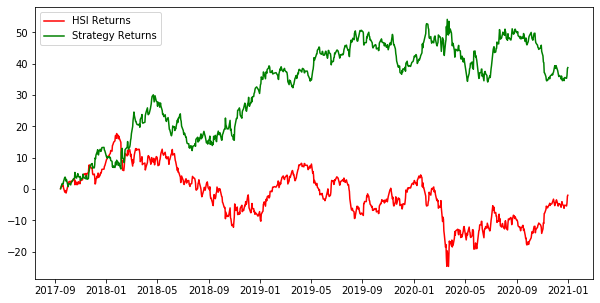

In [22]:
plt.figure(figsize=(10,5))
plt.plot(Cumulative_HSI_Returns, color='r', label='HSI Returns')
plt.plot(Cum_Strategy_Returns, color='g', label='Strategy Returns')
plt.legend()
plt.show()